# Tissue Culture Infective Dose

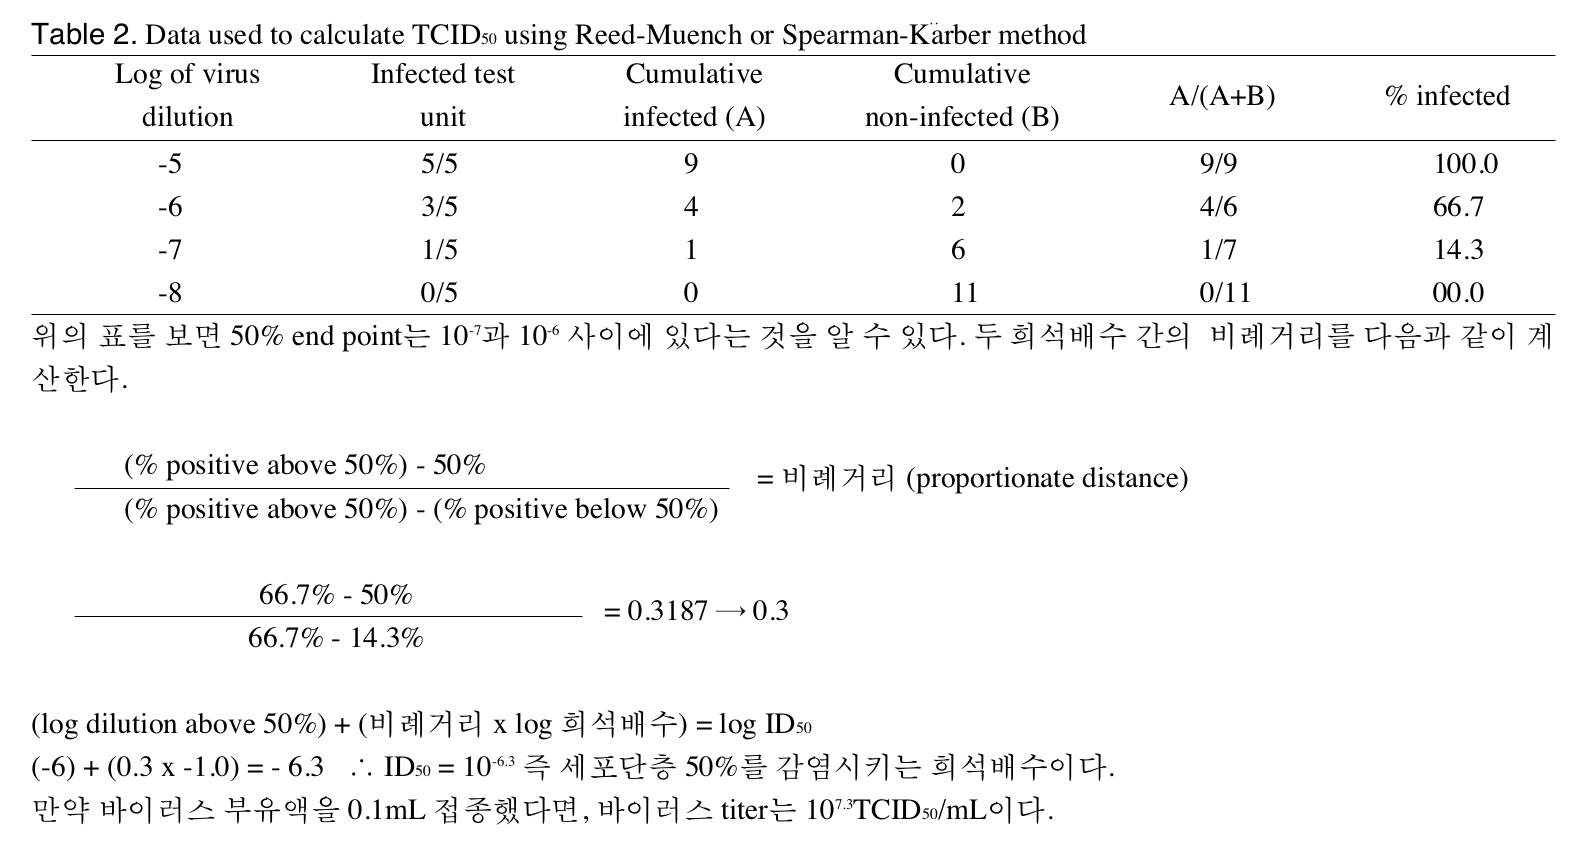

In [20]:
import numpy as np

def TCID50_Calculator(well, d_1, d_2, d_3, d_4, d_5, d_6, d_7, d_8):
    
    input_data = [d_1, d_2, d_3, d_4, d_5, d_6, d_7, d_8]
    
    
    # 누적 감염수 Cumulative infected(A)
    temp_A = 0
    A = []
    for a in range(1, len(input_data) + 1):
        temp_A += int(input_data[-a])
        A.append(temp_A)
    
    
    # 누적 비감염수 Cumulative non-infected(B)
    temp_B = 0
    B = []
    for b in range(len(input_data)):
        temp_B += well - int(input_data[b])
        B.append(temp_B)
        
        
    # infected(%)    
    infected_rate = []
    for i in range(len(input_data)):
        infected_rate.append(np.round(A[-(i+1)]/(A[-(i+1)]+B[i]), 3) * 100)
    
    
    # 비례거리 계Proportionate Distance
    positive_above = []
    positive_below = []
    for i in infected_rate:
        if i > 50.0:
            positive_above.append(i)
        elif i < 50.0:
            positive_below.append(i)
        else:
            continue
        
    proportionate_distance = np.round((min(positive_above) - 50) / (min(positive_above) - max(positive_below)), 1)

    
    # log ID_{50} : 세포단층 50%를 감여시키는 희석배수
    dilution = -len(positive_above)
    result = dilution + (proportionate_distance * (-1.0))
    
    TCID = (-result) + 1.0
    
    return TCID

In [21]:
TCID50_Calculator(5, 5, 5, 5, 5, 5, 3, 1, 0)

7.3